# COMPARITIVE STUDY OF UNSUPERVISED LEARNING TECHNIQUE - (KMEANS , Hierarchical Clustering)

# K-Means Clustering


In [ ]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [52]:
#Importing the mall dataset with pandas

dataset = pd.read_csv('Mall_Customers.csv')
print(dataset)
X = dataset.iloc[:,[3,4]].values
print(X)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 

In [53]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

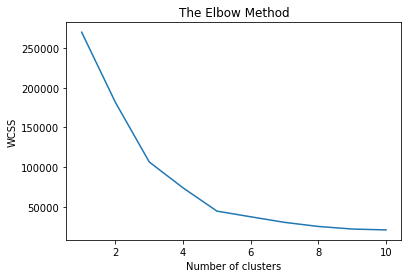

In [55]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [56]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)



In [57]:
Y_Kmeans
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

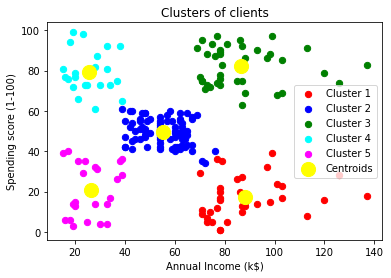

In [58]:
# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 40, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 40, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 40, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 40, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 40, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

Clustering with a shopping trend data set

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Read in the data set

In [29]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


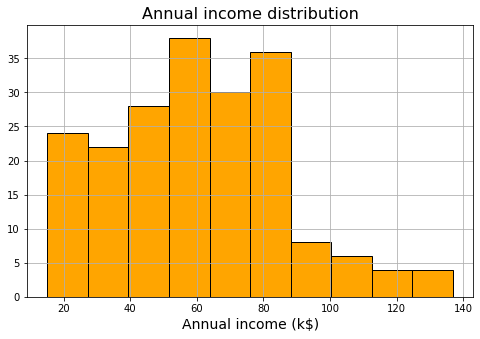

In [31]:
#Annual Income (k$)
plt.figure(figsize=(8,5))
plt.title("Annual income distribution",fontsize=16)
plt.xlabel ("Annual income (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor='k')
plt.show()

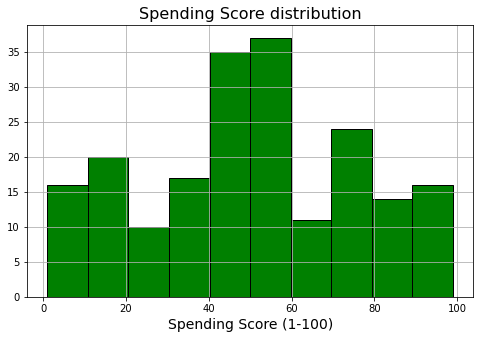

In [32]:
#Spending Score (1-100)
plt.figure(figsize=(8,5))
plt.title("Spending Score distribution",fontsize=16)
plt.xlabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='green',edgecolor='k')
plt.show()

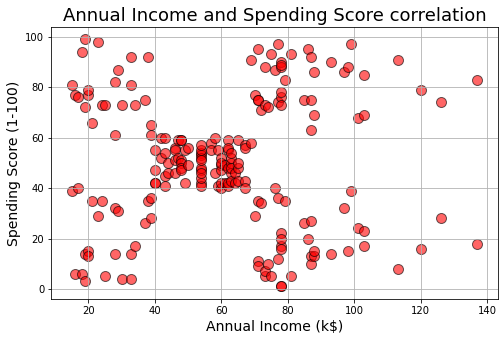

In [33]:
#definitive correlation between annual income and spending score
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

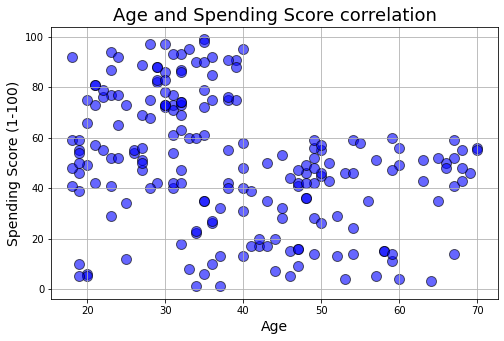

In [34]:
#correlation between age and spending score
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [35]:
#Dendograms
X = df.iloc[:,[3,4]].values

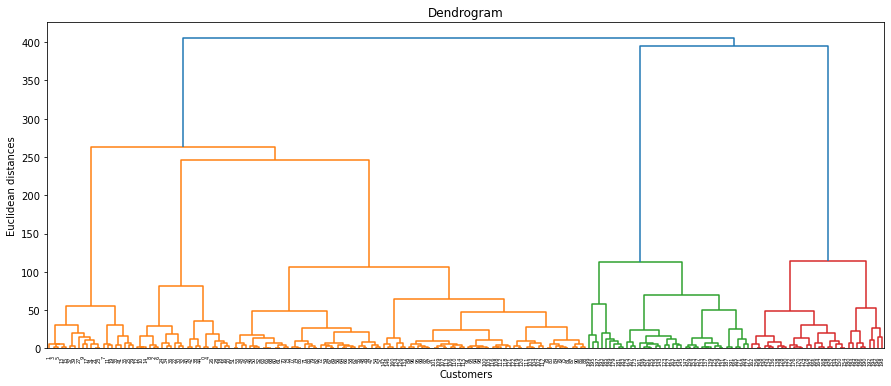

In [36]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [37]:
# Optimal number of clusters
# Often, the optimal number of clusters can be found from a Dendogram is a simple manner.

# Look for the longest stretch of vertical line which is not crossed by any extended horizontal lines (here extended means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
# Now take any point on that stretch of line and draw an imaginary horizontal line.
# Count how many vertical lines this imaginary lines crossed.
# That is likely to be the optimal number of clusters.

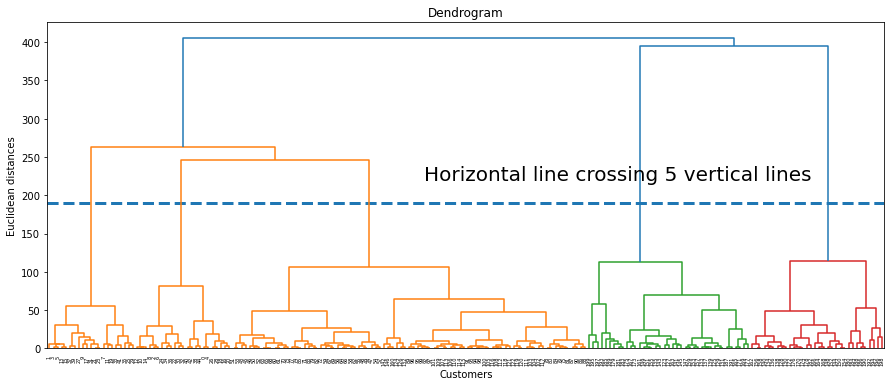

In [38]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

<!-- # By the above plot we can infer that 
# the horizontal line crossing the final vertical lines 
# obtained using agglomerative clustering technique gives us 5 Clusters -->

Horizanotal line predicts us the 5 clusters formed

In [44]:
pip install kmodes 

Note: you may need to restart the kernel to use updated packages.


In [59]:
from kmodes.kmodes import KModes
KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)

KModes(n_clusters=2, n_init=1, verbose=1)

In [60]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)
# Predicted clusters
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 842.0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint16)

In [61]:
cost = []

In [62]:
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 856.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 831.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 734.0


In [66]:
kmode = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
var1 =kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 746.0


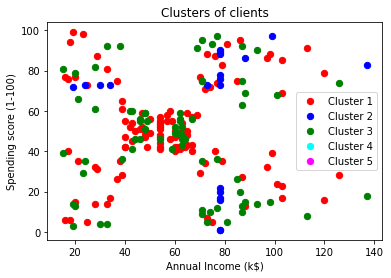

In [68]:
# Visualising the clusters

plt.scatter(X[var1 == 0, 0], X[var1 == 0,1],s = 40, c='red', label = 'Cluster 1')

plt.scatter(X[var1 == 1, 0], X[var1 == 1,1],s = 40, c='blue', label = 'Cluster 2')

plt.scatter(X[var1 == 2, 0], X[var1 == 2,1],s = 40, c='green', label = 'Cluster 3')

plt.scatter(X[var1 == 3, 0], X[var1 == 3,1],s = 40, c='cyan', label = 'Cluster 4')

plt.scatter(X[var1 == 4, 0], X[var1 == 4,1],s = 40, c='magenta', label = 'Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

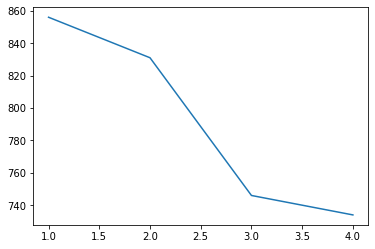

In [65]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

By the above scatter plot we can infer that k mode is not applicable  as scatter pot is uneven due to dataset